# 6.4 Supervised Machine Learning: Regression

## Contents:

1. Import Libraries
2. Import Datasets
3. Data Cleaning
4. Data Prep for Regression Analysis
5. Regression Analysis
6. Remove Outliers

## 1. Import Libraries

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Import Datasets

In [286]:
# import cleaned datasets

path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Data Immersion/A6, Advanced Analythics & Dashboard Design/Achievement 6/09-2024 SA Road Crash Analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_df.csv'))

## 3. Data Cleaning

In [288]:
df.columns

Index(['Unnamed: 0', 'REPORT_ID', 'crash_stats_area', 'crash_suburb',
       'crash_postcode', 'total_units', 'total_casualties', 'total_fatalities',
       'total_serious_injuries', 'total_minor_injuries', 'crash_month',
       'crash_day', 'crash_time', 'area_speed', 'moisture_conditions',
       'weather_conditions', 'crash_time_of_day', 'unit_responsible',
       'dui_involved', 'drugs_involved', 'accloc_x', 'accloc_y', 'unit_type',
       'unit_registration_year', 'unit_controller_sex', 'unit_controller_age',
       'unit_controller_licence_type', 'unit_number_of_occupants'],
      dtype='object')

In [289]:
# drop Unnamed: 0 column

df.drop(columns='Unnamed: 0', inplace=True)

In [290]:
df.head()

,REPORT_ID,crash_stats_area,crash_suburb,crash_postcode,total_units,total_casualties,total_fatalities,total_serious_injuries,total_minor_injuries,crash_month,...,dui_involved,drugs_involved,accloc_x,accloc_y,unit_type,unit_registration_year,unit_controller_sex,unit_controller_age,unit_controller_licence_type,unit_number_of_occupants
0,2019-1-16/08/2024,2 Metropolitan,Hampstead Gardens,5086,2,0,0,0,0,June,...,N,N,1331810.03,1676603.26,Station Wagon,1998.0,Female,85.0,Full,1.0
1,2019-2-16/08/2024,2 Metropolitan,Dry Creek,5094,2,0,0,0,0,January,...,N,N,1328376.20,1682942.63,Motor Cars - Sedan,2002.0,Female,31.0,Full,1.0
2,2019-3-16/08/2024,2 Metropolitan,Mile End,5031,2,1,0,0,1,January,...,N,N,1325819.68,1670994.26,Motor Vehicle - Type Unknown,1999.0,Unknown,95.0,Unknown,1.0
3,2019-4-16/08/2024,2 Metropolitan,Paralowie,5108,2,1,0,1,0,January,...,N,N,1328320.60,1690237.08,Motor Cycle,2015.0,Male,21.0,Learners,1.0
4,2019-5-16/08/2024,2 Metropolitan,Mount Barker,5251,2,0,0,0,0,January,...,N,N,1353279.99,1655645.15,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
df.shape

(63069, 27)

In [292]:
# check for missing values

df.isnull().sum()

REPORT_ID                          0
crash_stats_area                   0
crash_suburb                       0
crash_postcode                     0
total_units                        0
total_casualties                   0
total_fatalities                   0
total_serious_injuries             0
total_minor_injuries               0
crash_month                        0
crash_day                          0
crash_time                         0
area_speed                         0
moisture_conditions                0
weather_conditions                 0
crash_time_of_day                  0
unit_responsible                   0
dui_involved                       0
drugs_involved                     0
accloc_x                           0
accloc_y                           0
unit_type                       3693
unit_registration_year          3693
unit_controller_sex             3693
unit_controller_age             3693
unit_controller_licence_type    3693
unit_number_of_occupants        3693
d

In [293]:
# remove missing values since they are just over 5% of the total values

df_cleaned = df.dropna()

In [294]:
# check shape of cleaned dataframe

df_cleaned.shape

(59376, 27)

In [295]:
# check for duplicates

dups = df_cleaned.duplicated()
dups.shape

(59376,)

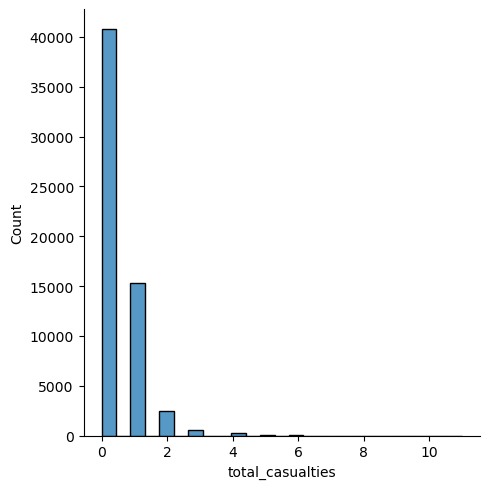

In [296]:
# check extreme values

sns.displot(df_cleaned['total_casualties'], bins=25)

In [297]:
# check the mean

df_cleaned['total_casualties'].mean()

0.3929028563729453

In [298]:
# check the median

df_cleaned['total_casualties'].median()

0.0

In [299]:
# check the maximum

df_cleaned['total_casualties'].max()

11

## 4. Data Prep for Regression Analysis

## Q5: State your hypothesis

Hypothesis: "As the area speed increases, so will the number of casualties."

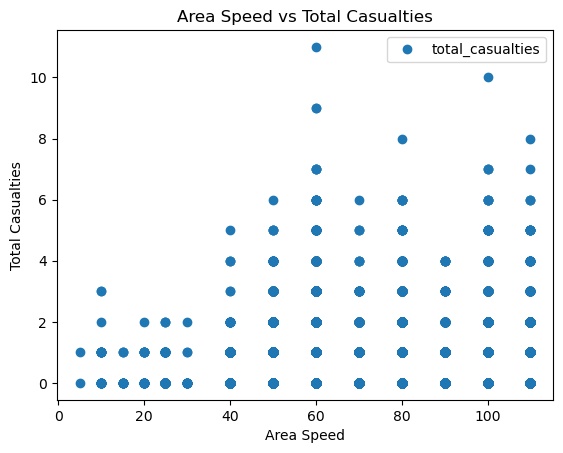

In [302]:
# create a scatterplot for area_speed and total_casualties

df_cleaned.plot(x = 'area_speed', y='total_casualties',style='o')
plt.title('Area Speed vs Total Casualties')  
plt.xlabel('Area Speed')  
plt.ylabel('Total Casualties')  
plt.show()

In [303]:
# reshape the variables into NumPy arrays and put them into separate objects

X = df_cleaned['area_speed'].values.reshape(-1,1)
y = df_cleaned['total_casualties'].values.reshape(-1,1)

In [304]:
X

array([[60],
       [90],
       [60],
       ...,
       [60],
       [70],
       [50]])

In [305]:
y

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [306]:
# split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5. Regression Analysis

In [308]:
# create a regression object

regression = LinearRegression()

In [309]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [310]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

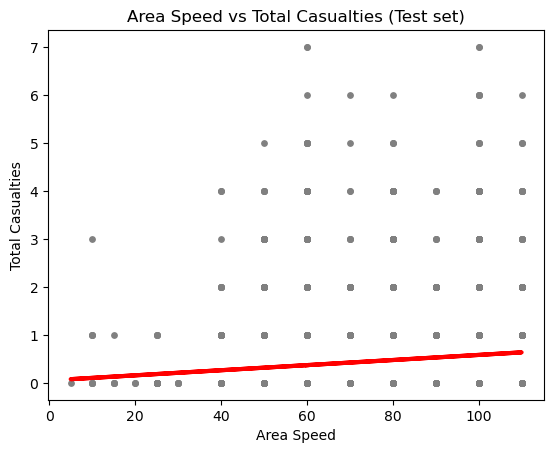

In [311]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Area Speed vs Total Casualties (Test set)')
plot_test.xlabel('Area Speed')
plot_test.ylabel('Total Casualties')
plot_test.show()

In [313]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [314]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00531727]]
Mean squared error:  0.4701427563528529
R2 score:  0.015317583509173671


In [316]:
y_predicted

array([[0.37062197],
       [0.37062197],
       [0.37062197],
       ...,
       [0.37062197],
       [0.37062197],
       [0.37062197]])

In [317]:
# create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.370622
1,0,0.370622
2,0,0.370622
3,0,0.370622
4,0,0.317449
5,0,0.476967
6,0,0.317449
7,0,0.370622
8,0,0.370622
9,0,0.317449


### 5.1 Compare how the regression fits the training set

In [320]:
# predict X_train

y_predicted_train = regression.predict(X_train)

In [321]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [322]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00531727]]
Mean squared error:  0.46122595940863
R2 score:  0.016516021391804303


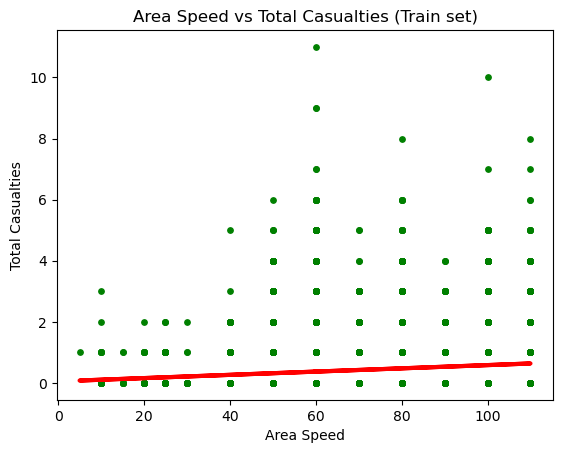

In [323]:
# visualise the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Area Speed vs Total Casualties (Train set)')
plot_test.xlabel('Area Speed')
plot_test.ylabel('Total Casualties')
plot_test.show()

## 6. Remove Outliers

In [326]:
# clean the extreme values from the total_casulaties variable observed during the consistency checks

df_test = df_cleaned[df_cleaned['total_casualties'] <=8] 

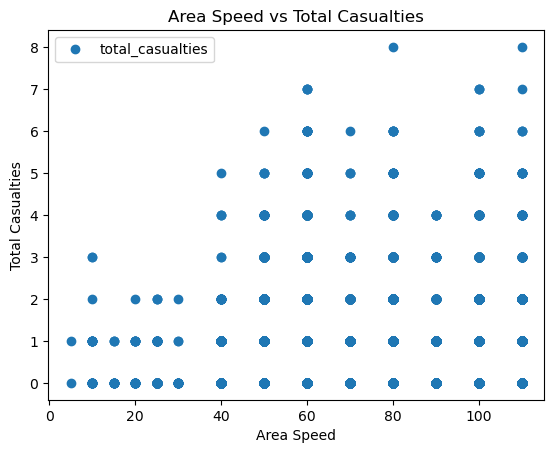

In [327]:
# scatterplot without outliers

df_test.plot(x = 'area_speed', y='total_casualties', style='o')  
plt.title('Area Speed vs Total Casualties')  
plt.xlabel('Area Speed')  
plt.ylabel('Total Casualties')  
plt.show()

In [328]:
# reshape the variables

X_2 = df_test['area_speed'].values.reshape(-1,1)
y_2 = df_test['total_casualties'].values.reshape(-1,1)

In [329]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [330]:
# run and fit the regression

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [331]:
# predict

y_predicted_2 = regression.predict(X_test_2)

In [332]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [333]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00520149]]
Mean squared error:  0.46559570862662314
R2 score:  0.01692098578097856


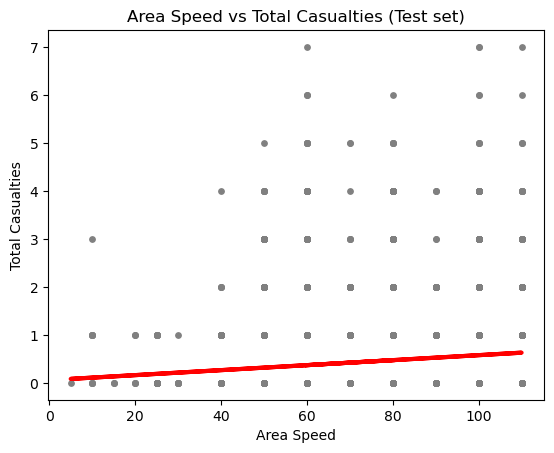

In [334]:
# visualise the test set results

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Area Speed vs Total Casualties (Test set)')
plot_test.xlabel('Area Speed')
plot_test.ylabel('Total Casualties')
plot_test.show()

In [335]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.370194
1,0,0.630268
2,0,0.370194
3,0,0.318179
4,0,0.318179
5,0,0.318179
6,0,0.630268
7,0,0.370194
8,0,0.370194
9,0,0.370194
